In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
pitch_1 = '100x25x150'
pitch_2 = '100x25'
pitch_3 = '50x25'
pitch_4 = '50x20'
pitch_5 = '50x15'
pitch_6 = '50x12P5'
pitch_7 = '50x10'

batch_size = 5000
date = '3Dec2024'

df_1 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/dataset_3sr_cotBeta1P5/{}_bs{}_{}_20t_dataset3sr_vars.parquet'.format(pitch_1, batch_size, date))
df_2 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/dataset_3sr_cotBeta1P5/{}_bs{}_{}_20t_dataset3sr_vars.parquet'.format(pitch_2, batch_size, date))
df_3 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/dataset_3sr_cotBeta1P5/{}_bs{}_{}_20t_dataset3sr_vars.parquet'.format(pitch_3, batch_size, date))
df_4 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/dataset_3sr_cotBeta1P5/{}_bs{}_{}_20t_dataset3sr_vars.parquet'.format(pitch_4, batch_size, date))
df_5 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/dataset_3sr_cotBeta1P5/{}_bs{}_{}_20t_dataset3sr_vars.parquet'.format(pitch_5, batch_size, date))
df_6 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/dataset_3sr_cotBeta1P5/{}_bs{}_{}_20t_dataset3sr_vars.parquet'.format(pitch_6, batch_size, date))
df_7 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/dataset_3sr_cotBeta1P5/{}_bs{}_{}_20t_dataset3sr_vars.parquet'.format(pitch_7, batch_size, date))

#### Scaling Lists for Different Pixel Pitches (dataset_2s):
* 100x25x100 um:  [150.0, 37.5, 10.0, 1.22]
* 50x25x100 um:   [75.0, 37.5, 10.0, 1.22]
* 50x20x100 um:   [75.0, 30.0, 10.0, 1.22]
* 50x15x100 um:   [75.0, 22.5, 10.0, 1.22]
* 50x12.5x100 um: [75.0, 18.75, 10.0, 1.22]
* 50x10x100 um:   [75.0, 15.0, 10.0, 1.22]

#### Scaling Lists for Different Pixel Pitches (dataset_3sr):
* 100x25x100 um:  [150.0, 37.5, 10.0, 10.0]
* 50x25x100 um:   [75.0, 37.5, 10.0, 10.0]
* 50x20x100 um:   [75.0, 30.0, 10.0, 10.0]
* 50x15x100 um:   [75.0, 22.5, 10.0, 10.0]
* 50x12.5x100 um: [75.0, 18.75, 10.0, 10.0]
* 50x10x100 um:   [75.0, 15.0, 10.0, 10.0]

#### Scaling Lists for Different Pixel Pitches (dataset_3sr, |cot$\beta$| $\leq$ 1.5):
* 100x25x100 um:  [150.0, 37.5, 10.0, 1.5]
* 50x25x100 um:   [75.0, 37.5, 10.0, 1.5]
* 50x20x100 um:   [75.0, 30.0, 10.0, 1.5]
* 50x15x100 um:   [75.0, 22.5, 10.0, 1.5]
* 50x12.5x100 um: [75.0, 18.75, 10.0, 1.5]
* 50x10x100 um:   [75.0, 15.0, 10.0, 1.5]

### $x$ Residuals

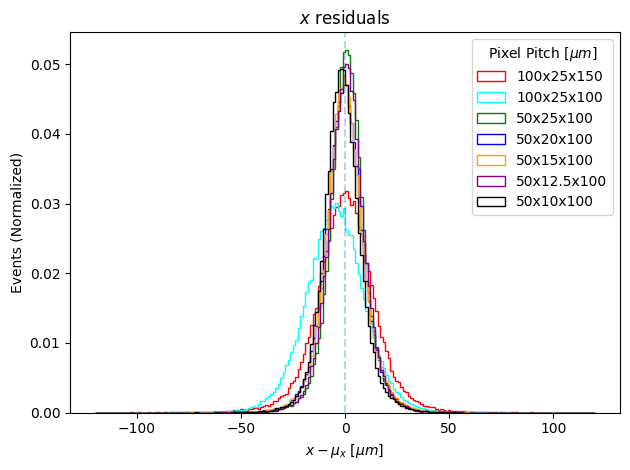

In [3]:
fig, ax = plt.subplots()
bins = np.linspace(-120,120,201)

ax.hist((df_1['residualsX'])*150.0, bins=bins, histtype='step', color='red', label='100x25x150', density=True)
ax.hist((df_2['residualsX'])*150.0, bins=bins, histtype='step', color='cyan', label='100x25x100', density=True)
ax.hist((df_3['residualsX'])*75.0, bins=bins, histtype='step', color='green', label='50x25x100', density=True)
ax.hist((df_4['residualsX'])*75.0, bins=bins, histtype='step', color='blue', label='50x20x100', density=True)
ax.hist((df_5['residualsX'])*75.0, bins=bins, histtype='step', color='orange', label='50x15x100', density=True)
ax.hist((df_6['residualsX'])*75.0, bins=bins, histtype='step', color='purple', label='50x12.5x100', density=True)
ax.hist((df_7['residualsX'])*75.0, bins=bins, histtype='step', color='black', label='50x10x100', density=True)

ax.axvline(alpha=0.3,ls='dashed')

ax.legend(title='Pixel Pitch $[\mu m]$')
ax.set_title('$x$ residuals')
ax.set_xlabel('$x - \mu_{x}$ $[\mu m]$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_cotBeta1P5_plots/performance/xresiduals.png', dpi=300)
fig.show()

### $y$ Residuals

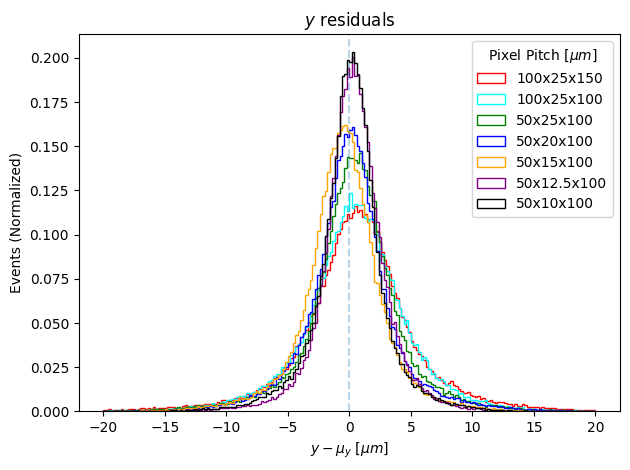

In [4]:
fig, ax = plt.subplots()
bins = np.linspace(-20,20,201)

ax.hist((df_1['residualsY'])*37.5, bins=bins, histtype='step', color='red', label='100x25x150', density=True)
ax.hist((df_2['residualsY'])*37.5, bins=bins, histtype='step', color='cyan', label='100x25x100', density=True)
ax.hist((df_3['residualsY'])*37.5, bins=bins, histtype='step', color='green', label='50x25x100', density=True)
ax.hist((df_4['residualsY'])*30.0, bins=bins, histtype='step', color='blue', label='50x20x100', density=True)
ax.hist((df_5['residualsY'])*22.5, bins=bins, histtype='step', color='orange', label='50x15x100', density=True)
ax.hist((df_6['residualsY'])*18.75, bins=bins, histtype='step', color='purple', label='50x12.5x100', density=True)
ax.hist((df_7['residualsY'])*15.0, bins=bins, histtype='step', color='black', label='50x10x100', density=True)
ax.axvline(alpha=0.3,ls='dashed')

ax.legend(title='Pixel Pitch $[\mu m]$')
ax.set_title('$y$ residuals')
ax.set_xlabel('$y - \mu_{y}$ $[\mu m]$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_cotBeta1P5_plots/performance/yresiduals.png', dpi=300)
fig.show()

### cot$\alpha$ Residuals

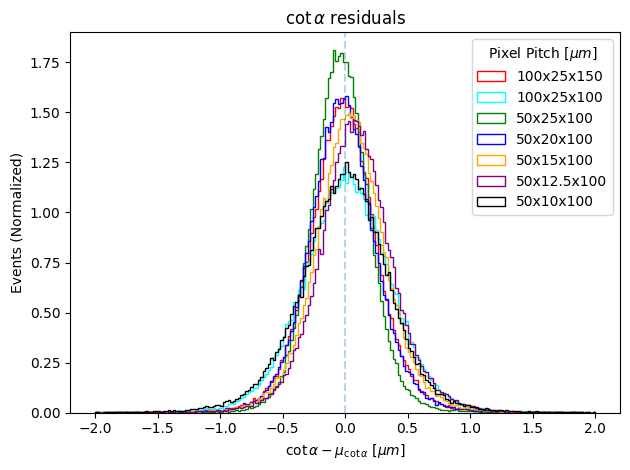

In [5]:
fig, ax = plt.subplots()
bins = np.linspace(-2,2,201)

ax.hist((df_1['residualsA'])*10.0, bins=bins, histtype='step', color='red', label='100x25x150', density=True)
ax.hist((df_2['residualsA'])*10.0, bins=bins, histtype='step', color='cyan', label='100x25x100', density=True)
ax.hist((df_3['residualsA'])*10.0, bins=bins, histtype='step', color='green', label='50x25x100', density=True)
ax.hist((df_4['residualsA'])*10.0, bins=bins, histtype='step', color='blue', label='50x20x100', density=True)
ax.hist((df_5['residualsA'])*10.0, bins=bins, histtype='step', color='orange', label='50x15x100', density=True)
ax.hist((df_6['residualsA'])*10.0, bins=bins, histtype='step', color='purple', label='50x12.5x100', density=True)
ax.hist((df_7['residualsA'])*10.0, bins=bins, histtype='step', color='black', label='50x10x100', density=True)
ax.axvline(alpha=0.3,ls='dashed')

ax.legend(title = 'Pixel Pitch $[\mu m]$')
ax.set_title(r'$\cot \alpha$ residuals')
ax.set_xlabel(r'$\cot \alpha - \mu_{\cot \alpha}$ $[\mu m]$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_cotBeta1P5_plots/performance/cotAresiduals.png', dpi=300)
fig.show()

### cot$\beta$ Residuals

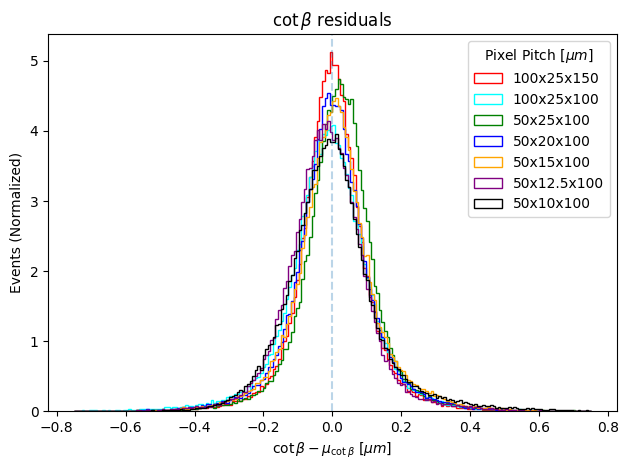

In [6]:
fig, ax = plt.subplots()
bins = np.linspace(-0.75,0.75,201)

ax.hist((df_1['residualsB'])*1.5, bins=bins, histtype='step', color='red', label='100x25x150', density=True)
ax.hist((df_2['residualsB'])*1.5, bins=bins, histtype='step', color='cyan', label='100x25x100', density=True)
ax.hist((df_3['residualsB'])*1.5, bins=bins, histtype='step', color='green', label='50x25x100', density=True)
ax.hist((df_4['residualsB'])*1.5, bins=bins, histtype='step', color='blue', label='50x20x100', density=True)
ax.hist((df_5['residualsB'])*1.5, bins=bins, histtype='step', color='orange', label='50x15x100', density=True)
ax.hist((df_6['residualsB'])*1.5, bins=bins, histtype='step', color='purple', label='50x12.5x100', density=True)
ax.hist((df_7['residualsB'])*1.5, bins=bins, histtype='step', color='black', label='50x10x100', density=True)
ax.axvline(alpha=0.3,ls='dashed')

ax.legend(title = 'Pixel Pitch $[\mu m]$')
ax.set_title(r'$\cot \beta$ residuals')
ax.set_xlabel(r'$\cot \beta - \mu_{\cot \beta}$ $[\mu m]$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_cotBeta1P5_plots/performance/cotBresiduals.png', dpi=300)
fig.show()

### $x$ uncertainties

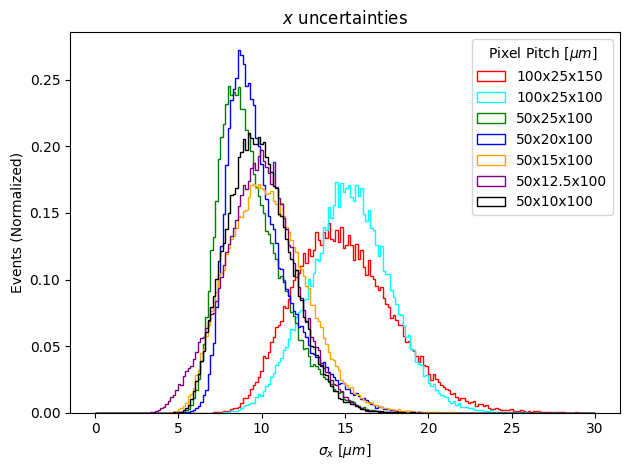

In [7]:
fig, ax = plt.subplots()
bins = np.linspace(0,30,201)

ax.hist((df_1['sigmax'])*150.0, bins=bins, histtype='step', color='red', label='100x25x150', density=True)
ax.hist((df_2['sigmax'])*150.0, bins=bins, histtype='step', color='cyan', label='100x25x100', density=True)
ax.hist((df_3['sigmax'])*75.0, bins=bins, histtype='step', color='green', label='50x25x100', density=True)
ax.hist((df_4['sigmax'])*75.0, bins=bins, histtype='step', color='blue', label='50x20x100', density=True)
ax.hist((df_5['sigmax'])*75.0, bins=bins, histtype='step', color='orange', label='50x15x100', density=True)
ax.hist((df_6['sigmax'])*75.0, bins=bins, histtype='step', color='purple', label='50x12.5x100', density=True)
ax.hist((df_7['sigmax'])*75.0, bins=bins, histtype='step', color='black', label='50x10x100', density=True)

ax.legend(title='Pixel Pitch $[\mu m]$')
ax.set_title('$x$ uncertainties')
ax.set_xlabel('$\sigma_{x}$ $[\mu m]$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_cotBeta1P5_plots/performance/sigmax.png', dpi=300)
fig.show()

### $y$ uncertainties

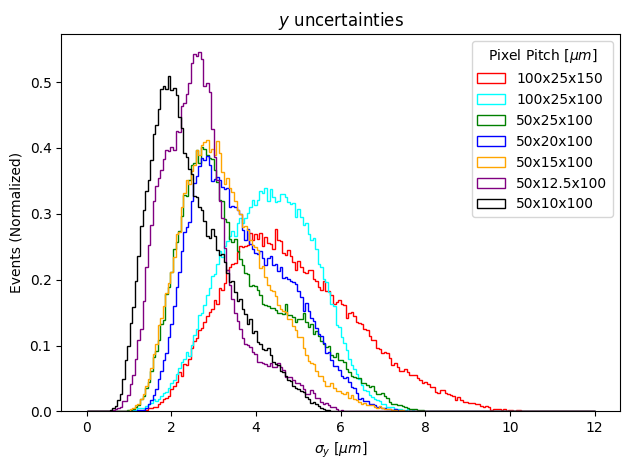

In [8]:
fig, ax = plt.subplots()
bins = np.linspace(0,12,201)

ax.hist((df_1['sigmay'])*37.5, bins=bins, histtype='step', color='red', label='100x25x150', density=True)
ax.hist((df_2['sigmay'])*37.5, bins=bins, histtype='step', color='cyan', label='100x25x100', density=True)
ax.hist((df_3['sigmay'])*37.5, bins=bins, histtype='step', color='green', label='50x25x100', density=True)
ax.hist((df_4['sigmay'])*30.0, bins=bins, histtype='step', color='blue', label='50x20x100', density=True)
ax.hist((df_5['sigmay'])*22.5, bins=bins, histtype='step', color='orange', label='50x15x100', density=True)
ax.hist((df_6['sigmay'])*18.75, bins=bins, histtype='step', color='purple', label='50x12.5x100', density=True)
ax.hist((df_7['sigmay'])*15.0, bins=bins, histtype='step', color='black', label='50x10x100', density=True)

ax.legend(title='Pixel Pitch $[\mu m]$')
ax.set_title('$y$ uncertainties')
ax.set_xlabel('$\sigma_{y}$ $[\mu m]$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_cotBeta1P5_plots/performance/sigmay.png', dpi=300)
fig.show()

### cot$\alpha$ uncertainties

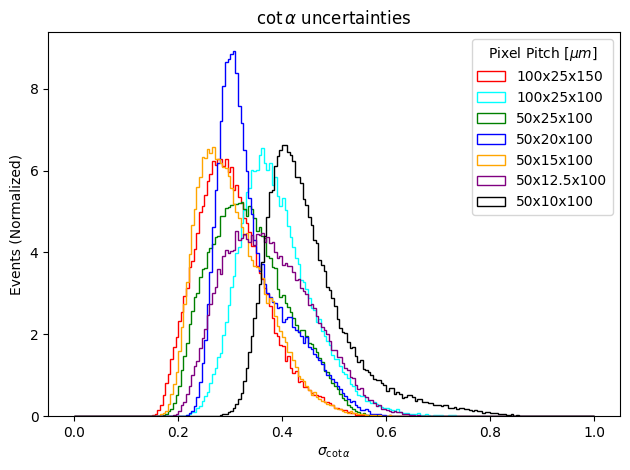

In [9]:
fig, ax = plt.subplots()
bins = np.linspace(0,1.0,201)

ax.hist((df_1['sigmacotA'])*10.0, bins=bins, histtype='step', color='red', label='100x25x150', density=True)
ax.hist((df_2['sigmacotA'])*10.0, bins=bins, histtype='step', color='cyan', label='100x25x100', density=True)
ax.hist((df_3['sigmacotA'])*10.0, bins=bins, histtype='step', color='green', label='50x25x100', density=True)
ax.hist((df_4['sigmacotA'])*10.0, bins=bins, histtype='step', color='blue', label='50x20x100', density=True)
ax.hist((df_5['sigmacotA'])*10.0, bins=bins, histtype='step', color='orange', label='50x15x100', density=True)
ax.hist((df_6['sigmacotA'])*10.0, bins=bins, histtype='step', color='purple', label='50x12.5x100', density=True)
ax.hist((df_7['sigmacotA'])*10.0, bins=bins, histtype='step', color='black', label='50x10x100', density=True)

ax.legend(title='Pixel Pitch $[\mu m]$')
ax.set_title(r'$\cot\alpha$ uncertainties')
ax.set_xlabel(r'$\sigma_{\cot\alpha}$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_cotBeta1P5_plots/performance/sigmacotA.png', dpi=300)
fig.show()

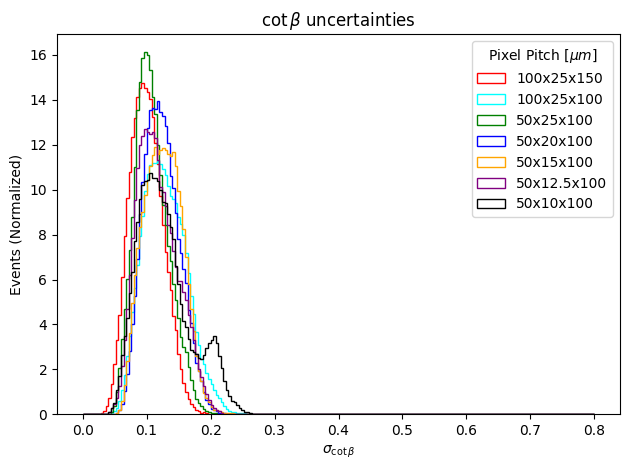

In [10]:
fig, ax = plt.subplots()
bins = np.linspace(0,0.8,201)

ax.hist((df_1['sigmacotB'])*1.5, bins=bins, histtype='step', color='red', label='100x25x150', density=True)
ax.hist((df_2['sigmacotB'])*1.5, bins=bins, histtype='step', color='cyan', label='100x25x100', density=True)
ax.hist((df_3['sigmacotB'])*1.5, bins=bins, histtype='step', color='green', label='50x25x100', density=True)
ax.hist((df_4['sigmacotB'])*1.5, bins=bins, histtype='step', color='blue', label='50x20x100', density=True)
ax.hist((df_5['sigmacotB'])*1.5, bins=bins, histtype='step', color='orange', label='50x15x100', density=True)
ax.hist((df_6['sigmacotB'])*1.5, bins=bins, histtype='step', color='purple', label='50x12.5x100', density=True)
ax.hist((df_7['sigmacotB'])*1.5, bins=bins, histtype='step', color='black', label='50x10x100', density=True)

ax.legend(title='Pixel Pitch $[\mu m]$')
ax.set_title(r'$\cot \beta$ uncertainties')
ax.set_xlabel(r'$\sigma_{\cot \beta}$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_cotBeta1P5_plots/performance/sigmacotB.png', dpi=300)
fig.show()

### Residuals + Uncertainties Comparison

In [11]:
def residual_plot(ax, thisdf, var1, var2, label, name, color, scaling=1.0, alpha=0.2):
    
    nbins = 15
    
    var1_scaled = thisdf[var1] * scaling
    var2_scaled = thisdf[var2] * scaling
    residual_scaled = var1_scaled - var2_scaled
    
    xmin = np.min(var1_scaled)
    xmax = np.max(var1_scaled)
    
    step = 1.0*(xmax-xmin)/nbins
    
    x = sns.regplot(x=var1_scaled, y=residual_scaled, x_bins=np.linspace(xmin,xmax,nbins), fit_reg=None, marker='.', ax=ax, color=color, label=label)
    ax.set_xlabel('True ' + name)
    ax.set_ylabel('True - predicted ' + name)
    
    thisdf['residual'+var2] = residual_scaled
    print(var1)
    
    means = []
    upbar = []
    downbar = []
    for i in range(0,nbins):
        means += [np.mean(thisdf['residual'+var2][(var1_scaled>xmin + i*step) & (var1_scaled<xmin + (i+1)*step)])]
        upbar += [means[i] + np.mean(thisdf['sigma'+var2][(var1_scaled>xmin + i*step) & (var1_scaled<xmin + (i+1)*step)] * scaling)]
        downbar += [means[i] - np.mean(thisdf['sigma'+var2][(var1_scaled>xmin + i*step) & (var1_scaled<xmin + (i+1)*step)] * scaling)]
    ax.fill_between(x=np.linspace(xmin,xmax,nbins),y1=upbar,y2=downbar, alpha=alpha, color=color)

pi = 3.14159265359

def inverse_cot(cota):
    a = np.arctan(1.0/cota)
    a[np.where(a<0)] = a[np.where(a<0)] + pi
    return a    

def residual_plot_deg(ax, thisdf, var1, var2, label, name, color, scaling=1.0, alpha=0.2):
    # positions
    if 'cot' not in var1:
        residual_plot(ax, thisdf, var1, var2, name, scaling=scaling)
        return

    thisdf['angle'] = inverse_cot(thisdf[var2].values * scaling)*180/pi
    
    thisdf['angleup'] = abs(inverse_cot((thisdf[var2].values + thisdf['sigma'+var2].values) * scaling)*180/pi - thisdf['angle'])
    thisdf['angledown'] = abs(inverse_cot((thisdf[var2].values - thisdf['sigma'+var2].values) * scaling)*180/pi - thisdf['angle'])
    thisdf['angletrue'] = inverse_cot(thisdf[var1].values * scaling)*180/pi
        
    var1 = 'angletrue'
    var2 = 'angle'
    
    nbins = 15
    xmin = np.min(thisdf[var1])
    xmax = np.max(thisdf[var1])
    
    step = 1.0*(xmax-xmin)/nbins
        
    x = sns.regplot(x=thisdf[var1], y=(thisdf[var1]-thisdf[var2]), x_bins=np.linspace(xmin,xmax,nbins), fit_reg=None, marker='.', ax=ax, color=color, label=label)
    ax.set_xlabel('True ' + name)
    ax.set_ylabel('True - predicted ' + name)
    
    thisdf['residual'+var2] = (thisdf[var1]-thisdf[var2])
    print(var1)
    
    means = []    
    upbar = []
    downbar = []
    for i in range(0,nbins):
        means += [np.mean(thisdf['residual'+var2][(thisdf[var1]>xmin + i*step) & (thisdf[var1]<xmin + (i+1)*step)])]
        upbar += [means[i] + np.mean(thisdf['angleup'][(thisdf[var1]>xmin + i*step) & (thisdf[var1]<xmin + (i+1)*step)])]
        downbar += [means[i] - np.mean(thisdf['angledown'][(thisdf[var1]>xmin + i*step) & (thisdf[var1]<xmin + (i+1)*step)])]
    #ax.scatter(x=np.linspace(xmin,xmax,nbins),y=means)
    ax.fill_between(x=np.linspace(xmin,xmax,nbins),y1=upbar,y2=downbar, alpha=alpha, color=color)

### $x$ residuals + $\sigma_x$

xtrue
xtrue
xtrue
xtrue
xtrue
xtrue
xtrue


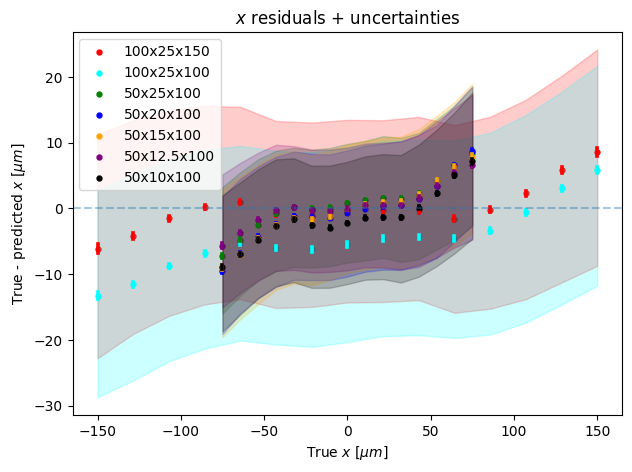

In [12]:
fig, ax = plt.subplots()

residual_plot(ax, df_1, 'xtrue', 'x', label='100x25x150', name=r'$x$ $[\mu m]$', color='red', scaling=150.0)
residual_plot(ax, df_2, 'xtrue', 'x', label='100x25x100', name=r'$x$ $[\mu m]$', color='cyan', scaling=150.0)
residual_plot(ax, df_3, 'xtrue', 'x', label='50x25x100', name=r'$x$ $[\mu m]$', color='green', scaling=75.0)
residual_plot(ax, df_4, 'xtrue', 'x', label='50x20x100', name=r'$x$ $[\mu m]$', color='blue', scaling=75.0)
residual_plot(ax, df_5, 'xtrue', 'x', label='50x15x100', name=r'$x$ $[\mu m]$', color='orange', scaling=75.0)
residual_plot(ax, df_6, 'xtrue', 'x', label='50x12.5x100', name=r'$x$ $[\mu m]$', color='purple', scaling=75.0)
residual_plot(ax, df_7, 'xtrue', 'x', label='50x10x100', name=r'$x$ $[\mu m]$', color='black', scaling=75.0)

ax.axhline(alpha=0.4, ls='dashed')
ax.legend(loc='upper left')
ax.set_title(r'$x$ residuals + uncertainties')
fig.tight_layout(pad=1.0)
fig.savefig('plots/dataset_3sr_cotBeta1P5_plots/performance/xresiduals_sigma.png', dpi=300)

### $y$ residuals + $\sigma_y$

ytrue
ytrue
ytrue
ytrue
ytrue
ytrue
ytrue


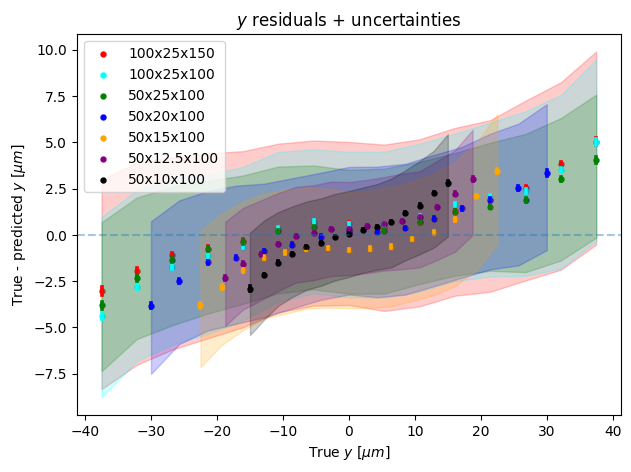

In [13]:
fig, ax = plt.subplots()

residual_plot(ax, df_1, 'ytrue', 'y', label='100x25x150', name=r'$y$ $[\mu m]$', color='red', scaling=37.5)
residual_plot(ax, df_2, 'ytrue', 'y', label='100x25x100', name=r'$y$ $[\mu m]$', color='cyan', scaling=37.5)
residual_plot(ax, df_3, 'ytrue', 'y', label='50x25x100', name=r'$y$ $[\mu m]$', color='green', scaling=37.5)
residual_plot(ax, df_4, 'ytrue', 'y', label='50x20x100', name=r'$y$ $[\mu m]$', color='blue', scaling=30.0)
residual_plot(ax, df_5, 'ytrue', 'y', label='50x15x100', name=r'$y$ $[\mu m]$', color='orange', scaling=22.5)
residual_plot(ax, df_6, 'ytrue', 'y', label='50x12.5x100', name=r'$y$ $[\mu m]$', color='purple', scaling=18.75)
residual_plot(ax, df_7, 'ytrue', 'y', label='50x10x100', name=r'$y$ $[\mu m]$', color='black', scaling=15.0)

ax.axhline(alpha=0.4, ls='dashed')
ax.legend(loc='upper left')
ax.set_title(r'$y$ residuals + uncertainties')
fig.tight_layout(pad=1.0)
fig.savefig('plots/dataset_3sr_cotBeta1P5_plots/performance/yresiduals_sigma.png', dpi=300)

### $\alpha$ residuals + $\sigma_{\alpha}$

/tmp/ipykernel_1410/961166308.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue


/tmp/ipykernel_1410/961166308.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue


/tmp/ipykernel_1410/961166308.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue


/tmp/ipykernel_1410/961166308.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue


/tmp/ipykernel_1410/961166308.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue


/tmp/ipykernel_1410/961166308.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue


/tmp/ipykernel_1410/961166308.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue


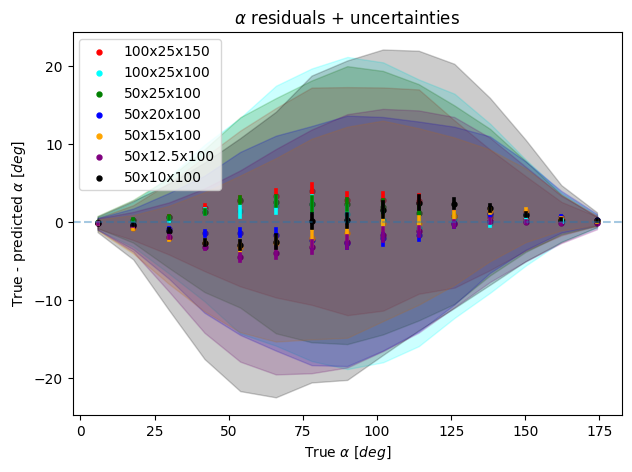

In [14]:
fig, ax = plt.subplots()

residual_plot_deg(ax, df_1, 'cotAtrue', 'cotA', label='100x25x150', name=r'$\alpha$ $[deg]$', color='red', scaling=10.0)
residual_plot_deg(ax, df_2, 'cotAtrue', 'cotA', label='100x25x100', name=r'$\alpha$ $[deg]$', color='cyan', scaling=10.0)
residual_plot_deg(ax, df_3, 'cotAtrue', 'cotA', label='50x25x100', name=r'$\alpha$ $[deg]$', color='green', scaling=10.0)
residual_plot_deg(ax, df_4, 'cotAtrue', 'cotA', label='50x20x100', name=r'$\alpha$ $[deg]$', color='blue', scaling=10.0)
residual_plot_deg(ax, df_5, 'cotAtrue', 'cotA', label='50x15x100', name=r'$\alpha$ $[deg]$', color='orange', scaling=10.0)
residual_plot_deg(ax, df_6, 'cotAtrue', 'cotA', label='50x12.5x100', name=r'$\alpha$ $[deg]$', color='purple', scaling=10.0)
residual_plot_deg(ax, df_7, 'cotAtrue', 'cotA', label='50x10x100', name=r'$\alpha$ $[deg]$', color='black', scaling=10.0)

ax.axhline(alpha=0.4, ls='dashed')
ax.legend(loc='upper left')
ax.set_title(r'$\alpha$ residuals + uncertainties')
fig.tight_layout(pad=1.0)
fig.savefig('plots/dataset_3sr_cotBeta1P5_plots/performance/Aresiduals_sigma.png', dpi=300)

/tmp/ipykernel_1410/961166308.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue
angletrue
angletrue
angletrue
angletrue
angletrue
angletrue


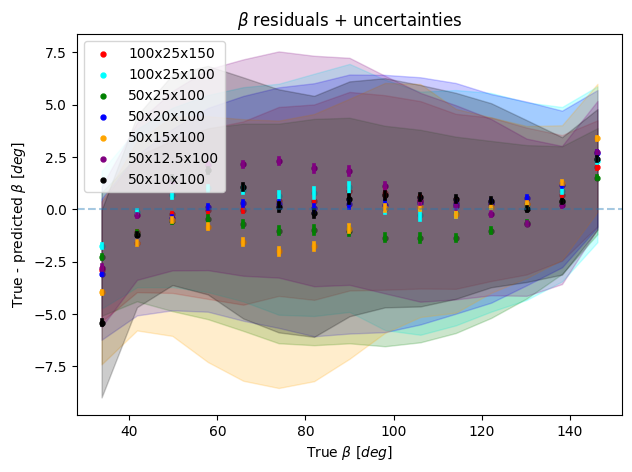

In [15]:
fig, ax = plt.subplots()

residual_plot_deg(ax, df_1, 'cotBtrue', 'cotB', label='100x25x150', name=r'$\beta$ $[deg]$', color='red', scaling=1.5)
residual_plot_deg(ax, df_2, 'cotBtrue', 'cotB', label='100x25x100', name=r'$\beta$ $[deg]$', color='cyan', scaling=1.5)
residual_plot_deg(ax, df_3, 'cotBtrue', 'cotB', label='50x25x100', name=r'$\beta$ $[deg]$', color='green', scaling=1.5)
residual_plot_deg(ax, df_4, 'cotBtrue', 'cotB', label='50x20x100', name=r'$\beta$ $[deg]$', color='blue', scaling=1.5)
residual_plot_deg(ax, df_5, 'cotBtrue', 'cotB', label='50x15x100', name=r'$\beta$ $[deg]$', color='orange', scaling=1.5)
residual_plot_deg(ax, df_6, 'cotBtrue', 'cotB', label='50x12.5x100', name=r'$\beta$ $[deg]$', color='purple', scaling=1.5)
residual_plot_deg(ax, df_7, 'cotBtrue', 'cotB', label='50x10x100', name=r'$\beta$ $[deg]$', color='black', scaling=1.5)

ax.axhline(alpha=0.4, ls='dashed')
ax.legend(loc='upper left')
ax.set_title(r'$\beta$ residuals + uncertainties')
fig.tight_layout(pad=1.0)
fig.savefig('plots/dataset_3sr_cotBeta1P5_plots/performance/Bresiduals_sigma.png', dpi=300)

/tmp/ipykernel_1410/961166308.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue


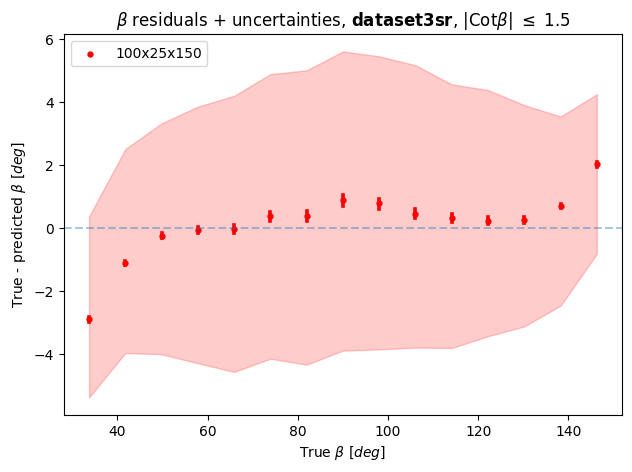

In [24]:
fig, ax = plt.subplots()

residual_plot_deg(ax, df_1, 'cotBtrue', 'cotB', label='100x25x150', name=r'$\beta$ $[deg]$', color='red', scaling=1.5)

ax.axhline(alpha=0.4, ls='dashed')
ax.legend(loc='upper left')
ax.set_title(r'$\beta$ residuals + uncertainties, $\mathbf{dataset 3sr}$, |Cot$\beta$| $\leq$ 1.5')
fig.tight_layout(pad=1.0)
fig.savefig('beta_residuals_sigma.png', dpi=300)

In [16]:
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

def pull_plot(ax, data, label, name, color):
    
    h = ax.hist(data, bins=np.linspace(-5,5,50), histtype='step', label=label, color=color)
    ax.legend(loc='upper right')
    ax.set_xlabel(name)
    ax.set_yscale('log')
    ax.axvline(alpha=0.3, ls='dashed')

    ydata = h[0]
    xdata = h[1][:-1]+5/49

    pars, cov = curve_fit(gauss,xdata,ydata,maxfev=5000)

    xbins = np.linspace(-5,5,100)
    ax.plot(xbins,gauss(xbins,pars[0],pars[1],pars[2]),color='black')
    ax.set_ylim(0.5,100000)

    #print('Mean',pars[1])
    #print('Sigma',pars[2])
    
    ax.text(-5,11000,"$\mu$="+str(round(pars[1],2)))
    ax.text(2,11000,"$\sigma$="+str(round(abs(pars[2]),2)))

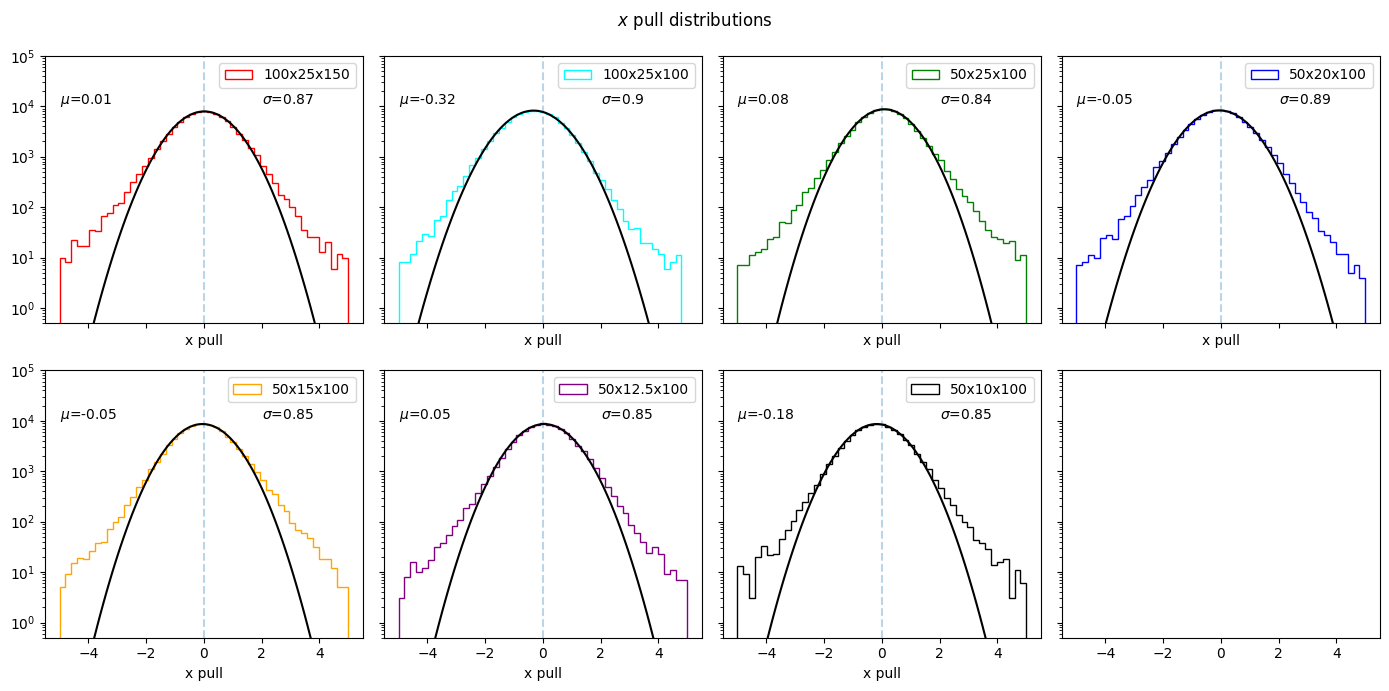

In [17]:
fig, axes = plt.subplots(2,4, sharex=True,sharey=True,figsize=(14,7))
pull_plot(axes[0][0], df_1['pullx'], label='100x25x150', name='x pull', color='red')
pull_plot(axes[0][1], df_2['pullx'], label='100x25x100', name='x pull', color='cyan')
pull_plot(axes[0][2], df_3['pullx'], label='50x25x100', name='x pull', color='green')
pull_plot(axes[0][3], df_4['pullx'], label='50x20x100', name='x pull', color='blue')
pull_plot(axes[1][0], df_5['pullx'], label='50x15x100', name='x pull', color='orange')
pull_plot(axes[1][1], df_6['pullx'], label='50x12.5x100', name='x pull', color='purple')
pull_plot(axes[1][2], df_7['pullx'], label='50x10x100', name='x pull', color='black')

fig.suptitle('$x$ pull distributions')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_cotBeta1P5_plots/performance/pullx.png', dpi=300)
fig.show()

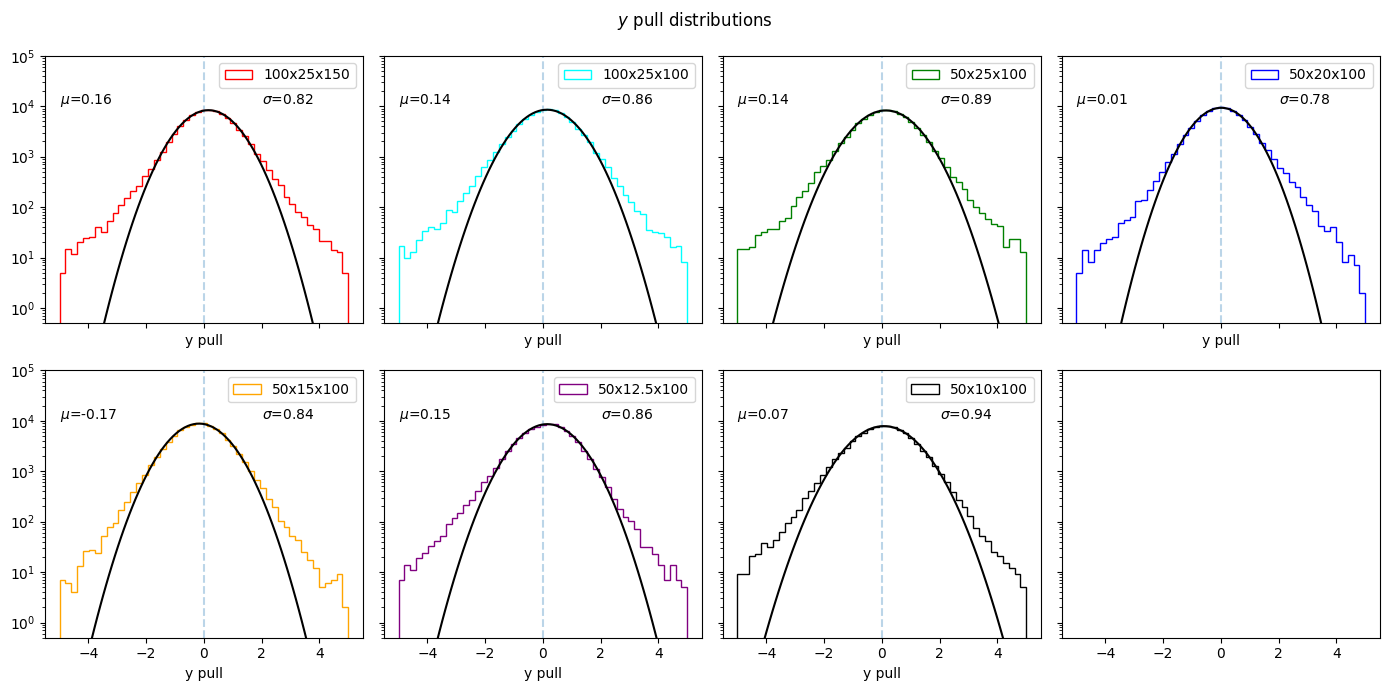

In [18]:
fig, axes = plt.subplots(2,4, sharex=True,sharey=True,figsize=(14,7))
pull_plot(axes[0][0], df_1['pully'], label='100x25x150', name='y pull', color='red')
pull_plot(axes[0][1], df_2['pully'], label='100x25x100', name='y pull', color='cyan')
pull_plot(axes[0][2], df_3['pully'], label='50x25x100', name='y pull', color='green')
pull_plot(axes[0][3], df_4['pully'], label='50x20x100', name='y pull', color='blue')
pull_plot(axes[1][0], df_5['pully'], label='50x15x100', name='y pull', color='orange')
pull_plot(axes[1][1], df_6['pully'], label='50x12.5x100', name='y pull', color='purple')
pull_plot(axes[1][2], df_7['pully'], label='50x10x100', name='y pull', color='black')

fig.suptitle('$y$ pull distributions')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_cotBeta1P5_plots/performance/pully.png', dpi=300)
fig.show()

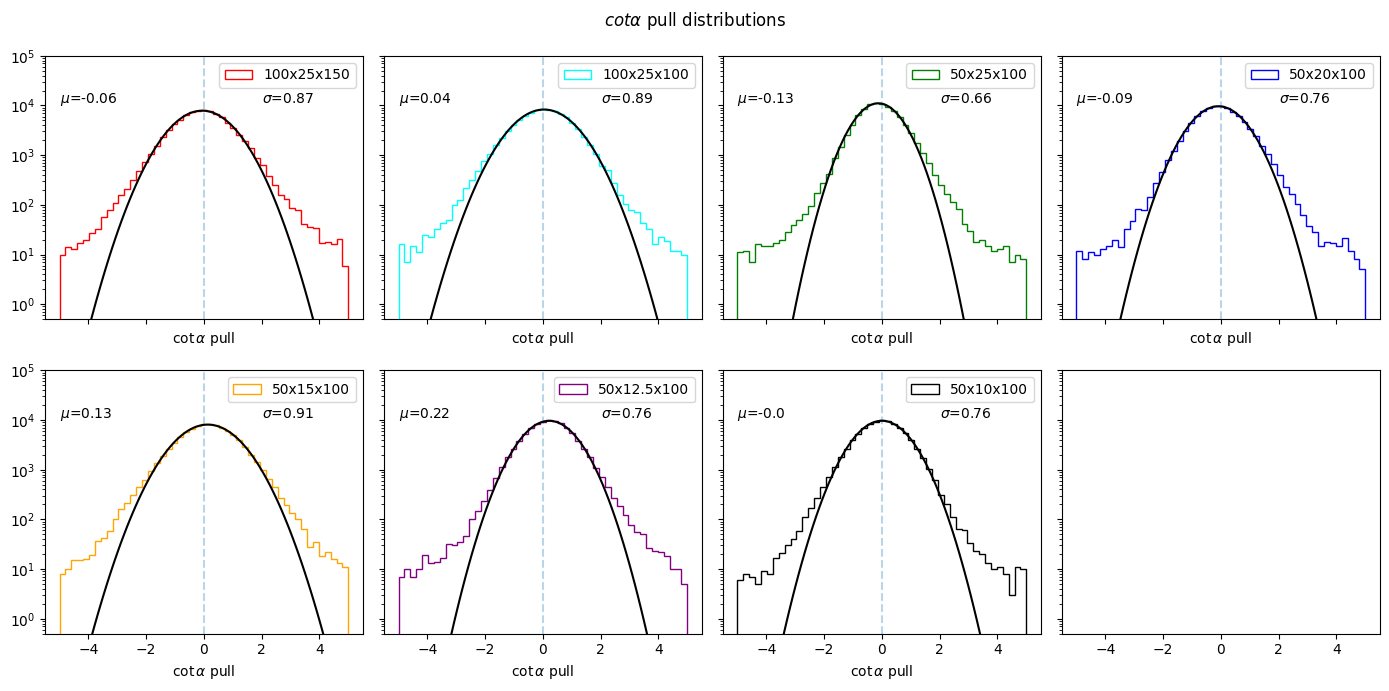

In [19]:
fig, axes = plt.subplots(2,4, sharex=True,sharey=True,figsize=(14,7))
pull_plot(axes[0][0], df_1['pullcotA'], label='100x25x150', name=r'$\cot\alpha$ pull', color='red')
pull_plot(axes[0][1], df_2['pullcotA'], label='100x25x100', name=r'$\cot\alpha$ pull', color='cyan')
pull_plot(axes[0][2], df_3['pullcotA'], label='50x25x100', name=r'$\cot\alpha$ pull', color='green')
pull_plot(axes[0][3], df_4['pullcotA'], label='50x20x100', name=r'$\cot\alpha$ pull', color='blue')
pull_plot(axes[1][0], df_5['pullcotA'], label='50x15x100', name=r'$\cot\alpha$ pull', color='orange')
pull_plot(axes[1][1], df_6['pullcotA'], label='50x12.5x100', name=r'$\cot\alpha$ pull', color='purple')
pull_plot(axes[1][2], df_7['pullcotA'], label='50x10x100', name=r'$\cot\alpha$ pull', color='black')

fig.suptitle(r'$cot \alpha$ pull distributions')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_cotBeta1P5_plots/performance/pullcotA.png', dpi=300)
fig.show()

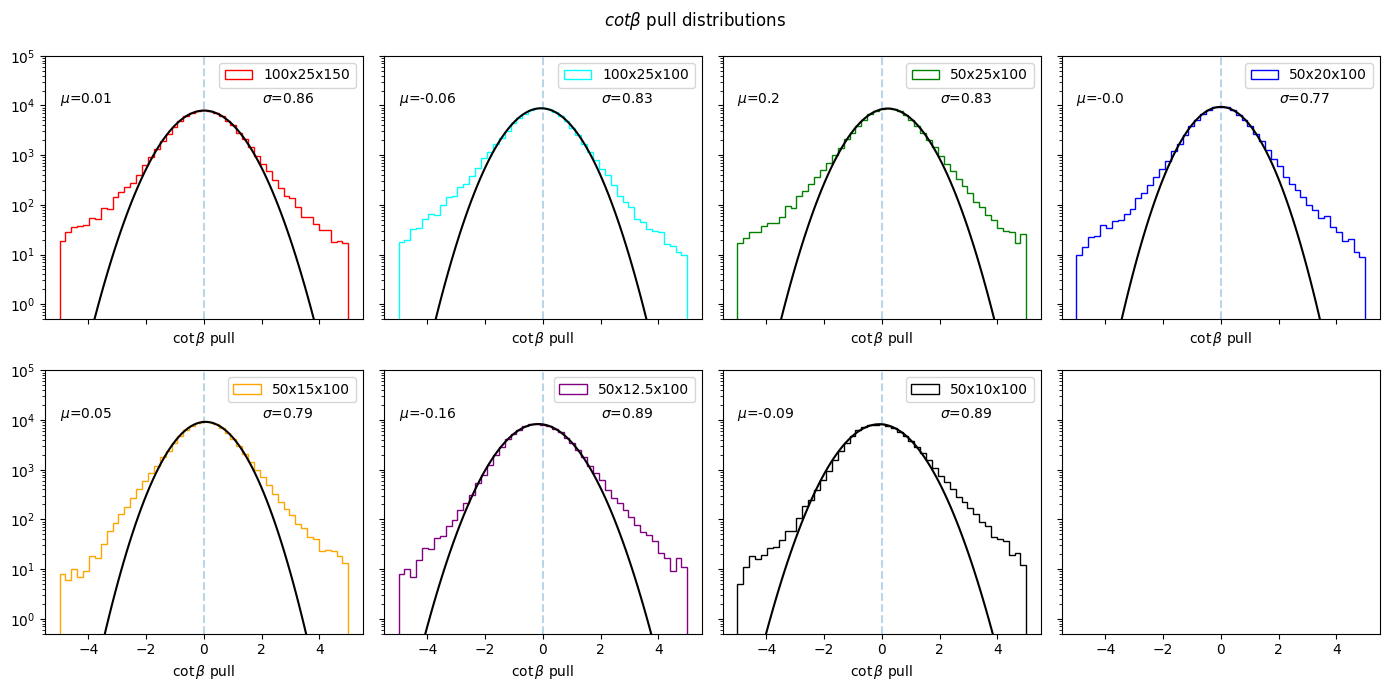

In [20]:
fig, axes = plt.subplots(2,4, sharex=True,sharey=True,figsize=(14,7))
pull_plot(axes[0][0], df_1['pullcotB'], label='100x25x150', name=r'$\cot\beta$ pull', color='red')
pull_plot(axes[0][1], df_2['pullcotB'], label='100x25x100', name=r'$\cot\beta$ pull', color='cyan')
pull_plot(axes[0][2], df_3['pullcotB'], label='50x25x100', name=r'$\cot\beta$ pull', color='green')
pull_plot(axes[0][3], df_4['pullcotB'], label='50x20x100', name=r'$\cot\beta$ pull', color='blue')
pull_plot(axes[1][0], df_5['pullcotB'], label='50x15x100', name=r'$\cot\beta$ pull', color='orange')
pull_plot(axes[1][1], df_6['pullcotB'], label='50x12.5x100', name=r'$\cot\beta$ pull', color='purple')
pull_plot(axes[1][2], df_7['pullcotB'], label='50x10x100', name=r'$\cot\beta$ pull', color='black')

fig.suptitle(r'$cot \beta$ pull distributions')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_cotBeta1P5_plots/performance/pullcotB.png', dpi=300)
fig.show()

#### KL Divergence for 2 Multivariate Gaussians:
$KL[P || Q] =  \frac{1}{2} \left[(\mu_2 - \mu_1)^\mathrm{T} \sigma_2^{-1} (\mu_2 - \mu_1) + \mathrm{tr}(\sigma_2^{-1} \sigma_1) - \ln\frac{|\sigma_1|}{|\sigma_2|} - n \right]$
* $P: x \textasciitilde N(\mu_1, \sigma_1)$
* $Q: x \textasciitilde N(\mu_2, \sigma_2)$

(source: https://statproofbook.github.io/P/mvn-kl.html)

In [25]:
def kl_divergence_4D(mu1, sigma1, mu2=np.array([[0],[0],[0],[0]]), sigma2=np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])):
    """
    Inputs:
    mu1 should be (4,1) numpy array representing the means of (x, y, cotAlpha, cotBeta)
    sigma1 is the (4,4) covariance matrix of (x, y, cotAlpha, cotBeta)

    Returns:
    KL Divergence value (float)
    """
    a = np.transpose(mu2-mu1)
    b = np.linalg.inv(sigma2)
    c = mu2-mu1
    d = np.trace(b @ sigma1)
    e = np.log(np.linalg.det(sigma1) / np.linalg.det(sigma2))
    f = 4 
    return np.round(np.concatenate(0.5*(a @ b @ c + d - e - f))[0],3)

In [27]:
# pitch 1
mus_1 = np.array([[0.01], [0.16], [-0.06], [0.01]])
sigmas_1 = np.array([[0.87,0,0,0],[0,0.82,0,0],[0,0,0.87,0],[0,0,0,0.86]])
kld_1 = kl_divergence_4D(mu1=mus_1, sigma1=sigmas_1)
print('kl divergence {}: {}'.format(pitch_1, kld_1))

# pitch 2
mus_2 = np.array([[-0.04], [-0.07], [-0.18], [-0.04]])
sigmas_2 = np.array([[0.9,0,0,0],[0,0.86,0,0],[0,0,0.89,0],[0,0,0,0.83]])
kld_2 = kl_divergence_4D(mu1=mus_2, sigma1=sigmas_2)
print('kl divergence {}: {}'.format(pitch_2, kld_2))

# pitch 3
mus_3 = np.array([[-0.32], [0.14], [0.04], [-0.06]])
sigmas_3 = np.array([[0.84,0,0,0],[0,0.89,0,0],[0,0,0.66,0],[0,0,0,0.83]])
kld_3 = kl_divergence_4D(mu1=mus_3, sigma1=sigmas_3)
print('kl divergence {}: {}'.format(pitch_3, kld_3))

# pitch 4
mus_4 = np.array([[-0.05], [0.01], [-0.09], [0.0]])
sigmas_4 = np.array([[0.89,0,0,0],[0,0.78,0,0],[0,0,0.76,0],[0,0,0,0.77]])
kld_4 = kl_divergence_4D(mu1=mus_4, sigma1=sigmas_4)
print('kl divergence {}: {}'.format(pitch_4, kld_4))

# pitch 5
mus_5 = np.array([[-0.05], [-0.17], [0.13], [0.05]])
sigmas_5 = np.array([[0.85,0,0,0],[0,0.84,0,0],[0,0,0.91,0],[0,0,0,0.79]])
kld_5 = kl_divergence_4D(mu1=mus_5, sigma1=sigmas_5)
print('kl divergence {}: {}'.format(pitch_5, kld_5))

# pitch 6
mus_6 = np.array([[0.05], [0.15], [0.22], [-0.16]])
sigmas_6 = np.array([[0.86,0,0,0],[0,0.85,0,0],[0,0,0.76,0],[0,0,0,0.89]])
kld_6 = kl_divergence_4D(mu1=mus_6, sigma1=sigmas_6)
print('kl divergence {}: {}'.format(pitch_6, kld_6))

# pitch 7
mus_7 = np.array([[-0.18], [0.07], [0.0], [0.09]])
sigmas_7 = np.array([[0.85,0,0,0],[0,0.94,0,0],[0,0,0.76,0],[0,0,0,0.89]])
kld_7 = kl_divergence_4D(mu1=mus_7, sigma1=sigmas_7)
print('kl divergence {}: {}'.format(pitch_7, kld_7))

kl divergence 100x25x150: 0.039
kl divergence 100x25: 0.04
kl divergence 50x25: 0.12
kl divergence 50x20: 0.056
kl divergence 50x15: 0.054
kl divergence 50x12P5: 0.082
kl divergence 50x10: 0.05


#### KL Divergence for 2 Univariate Gaussians: 
$KL[P||Q] = \log(\frac{\sigma_2}{\sigma_1}) + \frac{\sigma_1^2 + (\mu_1 - \mu_2)^2}{2\sigma_2^2} - \frac{1}{2}$


(source : https://stats.stackexchange.com/questions/7440/kl-divergence-between-two-univariate-gaussians)

In [ ]:
def kl_divergence_1d(mu1, sigma1, mu2=0, sigma2=1):
    return np.round(np.log(sigma2/sigma1) + (sigma1**2 + (mu1 - mu2)**2)/(2*sigma2**2) - 0.5, 3)

In [ ]:
# pull x
print('---PULLS x---')
kld_1_x = kl_divergence_1d(0.16,0.92)
print('kl divergence, pull x: {} ({})'.format(kld_1_x, pitch_1))
kld_2_x = kl_divergence_1d(-0.04,0.79)
print('kl divergence, pull x: {} ({})'.format(kld_2_x, pitch_2))
kld_3_x = kl_divergence_1d(-0.04,0.86)
print('kl divergence, pull x: {} ({})'.format(kld_3_x, pitch_3))
kld_4_x = kl_divergence_1d(0.15,0.86)
print('kl divergence, pull x: {} ({})'.format(kld_4_x, pitch_4))
kld_5_x = kl_divergence_1d(0.0,0.87)
print('kl divergence, pull x: {} ({})'.format(kld_5_x, pitch_5))
kld_6_x = kl_divergence_1d(0.03,0.8)
print('kl divergence, pull x: {} ({})'.format(kld_6_x, pitch_6))
kld_7_x = kl_divergence_1d(-0.16,0.9)
print('kl divergence, pull x: {} ({})'.format(kld_7_x, pitch_7))

# pull y
print('---PULLS y---')
kld_1_y = kl_divergence_1d(0.02,0.85)
print('kl divergence, pull y: {} ({})'.format(kld_1_y, pitch_1))
kld_2_y = kl_divergence_1d(-0.07,0.88)
print('kl divergence, pull y: {} ({})'.format(kld_2_y, pitch_2))
kld_3_y = kl_divergence_1d(0.07,0.87)
print('kl divergence, pull y: {} ({})'.format(kld_3_y, pitch_3))
kld_4_y = kl_divergence_1d(-0.01,0.85)
print('kl divergence, pull y: {} ({})'.format(kld_4_y, pitch_4))
kld_5_y = kl_divergence_1d(0.02,0.84)
print('kl divergence, pull y: {} ({})'.format(kld_5_y, pitch_5))
kld_6_y = kl_divergence_1d(-0.04,0.85)
print('kl divergence, pull y: {} ({})'.format(kld_6_y, pitch_6))
kld_7_y = kl_divergence_1d(0.02,0.89)
print('kl divergence, pull y: {} ({})'.format(kld_7_y, pitch_7))

# pull cotA
print('---PULLS cotA---')
kld_1_cotA = kl_divergence_1d(0.09,0.84)
print('kl divergence, pull cotA: {} ({})'.format(kld_1_cotA, pitch_1))
kld_2_cotA = kl_divergence_1d(-0.18,0.8)
print('kl divergence, pull cotA: {} ({})'.format(kld_2_cotA, pitch_2))
kld_3_cotA = kl_divergence_1d(-0.09,0.8)
print('kl divergence, pull cotA: {} ({})'.format(kld_3_cotA, pitch_3))
kld_4_cotA = kl_divergence_1d(-0.06,0.77)
print('kl divergence, pull cotA: {} ({})'.format(kld_4_cotA, pitch_4))
kld_5_cotA = kl_divergence_1d(-0.04,0.7)
print('kl divergence, pull cotA: {} ({})'.format(kld_5_cotA, pitch_5))
kld_6_cotA = kl_divergence_1d(-0.16,0.88)
print('kl divergence, pull cotA: {} ({})'.format(kld_6_cotA, pitch_6))
kld_7_cotA = kl_divergence_1d(0.09,0.76)
print('kl divergence, pull cotA: {} ({})'.format(kld_7_cotA, pitch_7))

# pull cotB
print('---PULLS cotB---')
kld_1_cotB = kl_divergence_1d(0.04,0.58)
print('kl divergence, pull cotB: {} ({})'.format(kld_1_cotB, pitch_1))
kld_2_cotB = kl_divergence_1d(-0.04,0.66)
print('kl divergence, pull cotB: {} ({})'.format(kld_2_cotB, pitch_2))
kld_3_cotB = kl_divergence_1d(-0.1,0.74)
print('kl divergence, pull cotB: {} ({})'.format(kld_3_cotB, pitch_3))
kld_4_cotB = kl_divergence_1d(0.07,0.75)
print('kl divergence, pull cotB: {} ({})'.format(kld_4_cotB, pitch_4))
kld_5_cotB = kl_divergence_1d(-0.02,0.63)
print('kl divergence, pull cotB: {} ({})'.format(kld_5_cotB, pitch_5))
kld_6_cotB = kl_divergence_1d(-0.18,0.67)
print('kl divergence, pull cotB: {} ({})'.format(kld_6_cotB, pitch_6))
kld_7_cotB = kl_divergence_1d(0.06,0.63)
print('kl divergence, pull cotB: {} ({})'.format(kld_7_cotB, pitch_7))